## Programming for Data Analysis - Project 2 ##

**Name: James McEneaney** <br/><br/>
**Course: Higher Diploma in Computing in Data Analytics, ATU Ireland** <br/><br/> 
**Semester: Semester 2 2023** <br/><br/>


***

### Introduction ###

### Data-cleansing ###

To begin, I will download the libraries I will use in this project. I will use pandas to create the dataframes which I will use to analyse the historical climate data:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss 

I have downloaded multiple climate related datasets online. These datasets were as follows:

- Atmospheric carbon dioxide concentratons from report by the Intergovernmental Panel on Climate Change (IPCC)

- Atmospheric carbon dioxide concentrations from a 2008 paper in Nature by Luthi et al.

- Temperature estimates going back over 820,000 years based on the EPICA Dome C Ice Core Deuterium Data. EPICA stands for European Project for Ice Coring in Antarctica. It estimates past temperature using Deuterium as a proxy. Deuterium is a heavy form of hydrogen (containing a neutron in addition to the one proton found in "light" hydrogen). In colder periods weather, there tends to be less deuterium in ice cores than in warmer periods. The reason for this is that during warm periods, more of the lighter form of hydrogen is evaporated away from the surface of the ocean, so that when the moist air moves northwards to the poles, it contains a higher ratio of heavy hydrogen than it contains during cold periods; precipitation then contains more of this heavy hydrogen and this ultimately shows up in the ice cores. I will refer to this dataset as the "Jouzel" dataset for convenience (Jean Jouzel is a French glaciologist and climatologist who is one of the creators of the dataset)

- Temperature data from Mauna Loa, providing annual data from 1958 to 2022

With the exception of the Mauna Loa dataset, these datasets were not in csv format initially. To make it easier to create dataframes using pandas, I saved all my source files as csv files in my working directory. I will edit the dataframes using python before I analyse the data, including renaming column headings. I will also add an extra column to the IPCC and Jouzel datasets to standardise the figures for time measurement. 

Firstly, I will load up and amend the IPCC CO2 dataset:

In [3]:
df_co2_ipcc = pd.read_csv("CO2_ipcc_csv.csv")

# rename column names of existing dataframe (setting 'inplace' parameter equal to 'True')
df_co2_ipcc.rename(columns={'Gasage (yr BP) ': 'Year before 1950', 'CO2 (ppmv)': 'CO2', 'sigma mean CO2 (ppmv)': 'sigma mean CO2'}, inplace=True) 

# here I am adding a new column called 'Years ago' to convert the make the time measurements easier to work with across different datasets.
# I am adding 73 years to every value in the 'years before 1950' column to effectively convert the column to 'years before 2023'
df_co2_ipcc['Years ago'] = df_co2_ipcc['Year before 1950'] + 73

print(df_co2_ipcc)

      Year before 1950     CO2  sigma mean CO2  Years ago
0               -51.03  368.02            0.06      21.97
1               -48.00  361.78            0.37      25.00
2               -46.28  359.65            0.10      26.72
3               -44.41  357.11            0.16      28.59
4               -43.08  353.95            0.04      29.92
...                ...     ...             ...        ...
1896         803925.28  202.92            2.06  803998.28
1897         804009.87  207.50            0.92  804082.87
1898         804522.67  204.86            1.64  804595.67
1899         805132.44  202.23            0.69  805205.44
1900         805668.87  207.29            2.20  805741.87

[1901 rows x 4 columns]


Next, I will load up and amend the 2008 Nature paper dataset:

In [4]:
df_co2_nature = pd.read_csv("CO2_nature_csv.csv")

df_co2_nature.rename(columns={'EDC3_gas_a (yr)': 'Years ago', 'CO2 (ppmv)': 'CO2'}, inplace=True)

print(df_co2_nature)

      Years ago    CO2
0           137  280.4
1           268  274.9
2           279  277.9
3           395  279.1
4           404  281.9
...         ...    ...
1091     794608  199.4
1092     795202  195.2
1093     796467  189.3
1094     797099  188.4
1095     798512  191.0

[1096 rows x 2 columns]


Next, the "jouzel" temperature data inferred from deuterium levels in ice cores from EPICA Dome C:

In [5]:
df_temp_jouzel_csv = pd.read_csv("temp_jouzel_csv.csv")

df_temp_jouzel_csv.rename(columns={'bag': 'bag', 'ztop': 'depth', 'EDC3béta': 'Years before 1950', 'AICC2012': 'year_new', 'deutfinal': 'deuterium', 'temp': 'temp_Kelvin', 'acc-EDC3beta' : 'acc-EDC3beta'}, inplace=True)

# adding a new column called 'Years ago' to standardise the measurement of time across datasets
df_temp_jouzel_csv['Years ago'] = df_temp_jouzel_csv['Years before 1950'] + 73

print(df_temp_jouzel_csv)

       bag    depth  Years before 1950       year_new  deuterium  temp_Kelvin  \
0        1     0.00          -50.00000     -55.000000        NaN        218.3   
1        2     0.55          -43.55977     -50.513333        NaN        218.3   
2        3     1.10          -37.44019     -46.026667        NaN        218.3   
3        4     1.65          -31.64156     -41.540000        NaN        218.3   
4        5     2.20          -24.55278     -34.516667        NaN        218.3   
...    ...      ...                ...            ...        ...          ...   
5814  5815  3197.70       816871.60000  817562.000000     -432.2        211.0   
5815  5816  3198.25       817693.60000  818631.000000     -431.4        211.2   
5816  5817  3198.80       818505.50000  819700.000000     -430.3        211.3   
5817  5818  3199.35       819303.10000  820769.000000     -429.8        211.4   
5818  5819  3199.90       820093.90000  821838.000000     -430.0        211.4   

      acc-EDC3beta     Year

In [12]:
df_mauna_loa_csv = pd.read_csv("mauna_loa_csv.csv")

# reversed order of all the rows so that the data for the most recent year is at the top
df_mauna_loa_csv = df_mauna_loa_csv[::-1]

# create a new column called 'Years ago', to standardise the measurement of time across the datasets
df_mauna_loa_csv['Years ago'] = 2023 - df_mauna_loa_csv['year']

print(df_mauna_loa_csv)

    year    mean   unc  Years ago
63  2022  418.53  0.12          1
62  2021  416.41  0.12          2
61  2020  414.21  0.12          3
60  2019  411.65  0.12          4
59  2018  408.72  0.12          5
..   ...     ...   ...        ...
4   1963  318.99  0.12         60
3   1962  318.45  0.12         61
2   1961  317.64  0.12         62
1   1960  316.91  0.12         63
0   1959  315.98  0.12         64

[64 rows x 4 columns]


<Axes: title={'center': 'Atmospheric carbon dioxide concentrations (parts per million by volume) over the past 800000 years'}, xlabel='Years ago', ylabel='CO2'>

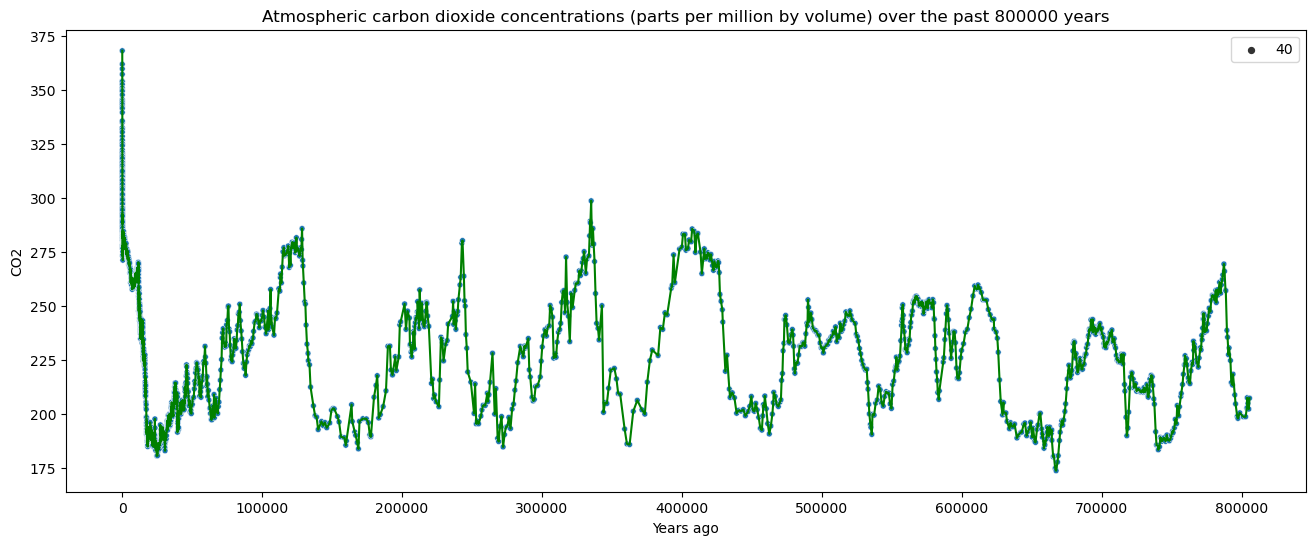

In [7]:
plt.figure(figsize= (16,6))
plt.title('Atmospheric carbon dioxide concentrations (parts per million by volume) over the past 800000 years')

sns.scatterplot(x='Years ago', y='CO2', data=df_co2_ipcc, size = 40)      # use 'size' parameter to decrease size of markers 

sns.lineplot(x = 'Years ago', y = 'CO2', data = df_co2_ipcc, color = 'green')

<Axes: title={'center': 'Atmospheric carbon dioxide concentrations (parts per million by volume) over the past 800000 years'}, xlabel='Years ago', ylabel='CO2'>

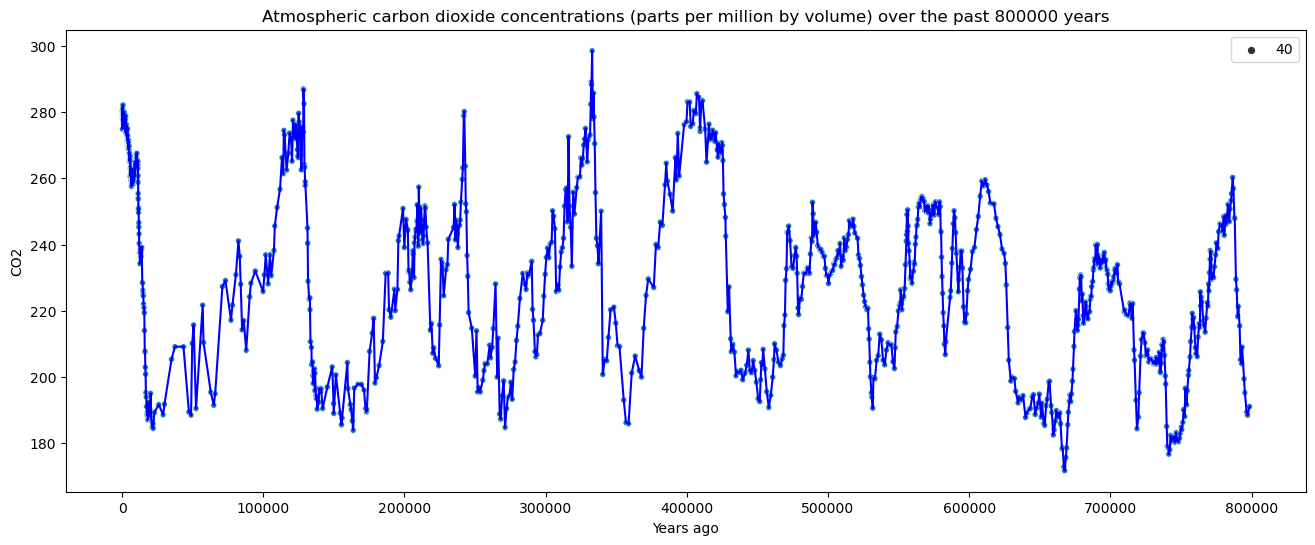

In [8]:
plt.figure(figsize= (16,6))
plt.title('Atmospheric carbon dioxide concentrations (parts per million by volume) over the past 800000 years')

sns.scatterplot(x='Years ago', y='CO2', data=df_co2_nature, size = 40)      # use 'size' parameter to decrease size of markers 

sns.lineplot(x = 'Years ago', y = 'CO2', data = df_co2_nature, color = 'blue')


### CO2 versus Temperature Anomoly ###

### CH4 versus Temperature Anomoly ###

### Climate change signals in the Irish context ###

### Fusion of datasets ###

### Prediction of Global Temperature Anomoly ###

### Accelerating increases of temperature ###

### Summary ###

### References ###